# Semantics Part 1 - variables and objects in Python

* Now we move to the *semantics* of Python language which involves the meaning of statements.
* We will start with *variables* and *objects*, which are the main ways you store, reference, and operate on data within a Python script.

## Python variables are pointers

Assigning variables in Python is as easy as putting a variable name to the left of the equals (``=``) sign:

```python
# assign 4 to the variable x
x = 4
```
Note that you don't have to declare a variable type before the assignment.

In many programming languages, **variables** = **"buckets" of data**. In FORTRAN, for example, when you write

```fortran
! FORTRAN code
integer x
x = 4
```
you are essentially defining a "memory bucket" named ``x``, and putting an integer value ``4`` into it.

In **Python**, by contrast, variables are **pointers that reference objects**. When you write

```python
x = 4
```
you are essentially defining a *pointer* named ``x`` that points to some other bucket containing the value ``4``. Therefore, there is no need to "declare" the variable.

This is the sense in which people say Python is *dynamically-typed*: variable names can point to objects of any type.

So in Python, you can do things like this:

In [ ]:
x = 1         # x is an integer
x = 'hello'   # now x is a string
x = [1, 2, 3] # now x is a list

While users of statically-typed languages might miss the type-safety that comes with declarations like those found in FORTRAN or C, this dynamic typing is one of the pieces that makes Python so quick to write and easy to read.


### Dangers of "variable as pointer" model

If we have two variable names pointing to the same *mutable* object, then changing one will change the other as well!

For example, let's create and modify a list:

In [ ]:
x = [3, 2, 1]
y = x

We've created two variables ``x`` and ``y`` which both point to the same object.
Because of this, if we modify the list via one of its names, we'll see that the "other" list will be modified as well:

In [ ]:
print(y)

In [ ]:
x.append(4) # append 4 to the list pointed to by x
print(y) # y's list is modified as well!

This behavior might seem confusing if you're wrongly thinking of variables as buckets that contain data.
But if you're correctly thinking of variables as pointers to objects, then this behavior makes sense.

Note also that if we use "``=``" to assign another value to ``x``, this will not affect the value of ``y`` - assignment is simply a change of what object the variable points to:

In [ ]:
x = 'something else'
print(y)  # y is unchanged

x = [4, 5, 1]
print(y) # y is unchanged

Again, this makes perfect sense if you think of ``x`` and ``y`` as pointers, and the "``=``" operator as an operation that changes what the name points to.


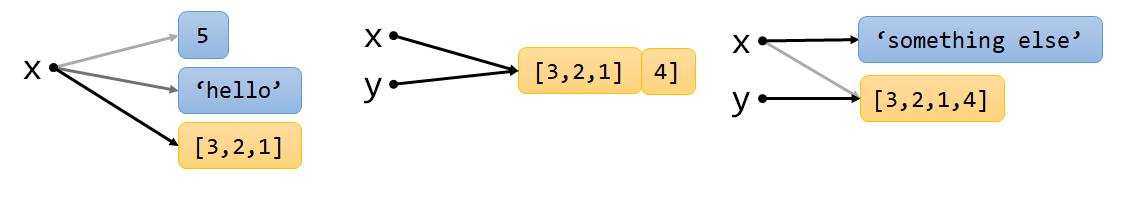

### Mutable vs. imutable types

You might wonder whether this pointer idea makes arithmetic operations in Python difficult to track, but Python is set up so that this is not an issue. Numbers, strings, and other *simple types* are immutable: you can't change their value – you can only change what values the variables point to.
So, for example, it's perfectly safe to do operations like the following:

In [ ]:
x = 10
y = x
x = x + 5  # add 5 to x's value, and assign it to x
print("x =", x)
print("y =", y)

When we call ``x = x + 5``, we are not modifying the value of the ``5`` object pointed to by ``x``, but rather we are changing the object to which ``x`` points.
For this reason, the value of ``y`` is not affected by the operation.

### `copy()`

When occasionally you actually need a of a mutable object in memory to further modify you can explicit make a copy. In practice this is a rare occasion as it is an inefficient thing to do.

In [ ]:
x = [3, 2, 1, 5]
y = x.copy()
y.append(5)
print("x =", x)
print("y =", y)

More often than not what we want is to generate a new modified variable, instead of an exact copy. In this example we wanted a sorted list.

In [ ]:
z = sorted(y)
print("z =", z)
print("y =", y)

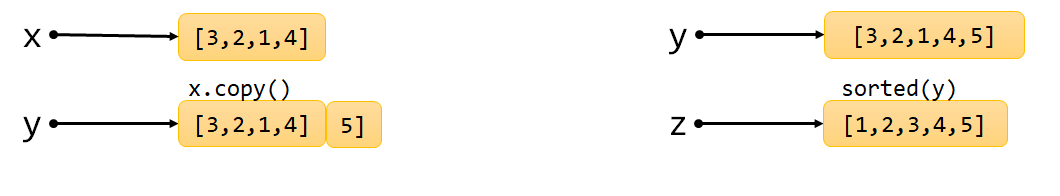

## Everything is an object

Python is an object-oriented programming language, and in Python everything is an object.

In OOP languages, an *object* is an entity that contains data along with associated metadata and/or functionality.
In Python everything is an object, which means **every entity** has some metadata (called **attributes**) and associated functionality (called **methods**).
These attributes and methods are accessed via the **dot syntax**.

For example, before we saw that lists have an ``append`` method, which adds an item to the list, and is accessed via the dot ("``.``") syntax:

In [ ]:
L = [1, 2, 3]
L.append(100)
print(L)

While it might be expected for compound objects like lists to have attributes and methods, what is sometimes unexpected is that in Python even simple types have attached attributes and methods.
For example, numerical types have a ``real`` and ``imag`` attribute that returns the real and imaginary part of the value, if viewed as a complex number:

In [ ]:
x = 4.5
print(x.real, "+", x.imag, 'i')

Methods are like attributes, except they are functions that you can call using opening and closing parentheses.
For example, floating point numbers have a method called ``is_integer`` that checks whether the value is an integer:

In [ ]:
x = 4.5
x.is_integer()

In [ ]:
x = 4.0
x.is_integer()

When we say that everything in Python is an object, we really mean that *everything* is an object – even the attributes and methods of objects are themselves objects with their own ``type`` information:

In [ ]:
type(x.is_integer)

We'll find that the everything-is-object design choice of Python allows for some very convenient language constructs.

## Built-in types of variables

<center>**Python Scalar Types or Simple Types**</center>

| Type        | Example        | Description                                                  |
|-------------|----------------|--------------------------------------------------------------|
| ``int``     | ``x = 1``      | integers (i.e., whole numbers)                               |
| ``float``   | ``x = 1.0``    | floating-point numbers (i.e., real numbers)                  |
| ``complex`` | ``x = 1 + 2j`` | Complex numbers (i.e., numbers with real and imaginary part) |
| ``bool``    | ``x = True``   | Boolean: True/False values                                   |
| ``str``     | ``x = 'abc'``  | String: characters or text                                   |
| ``NoneType``| ``x = None``   | Special object indicating nulls                              |



<center>**Data Structures**</center>

| Type Name | Example                   |Description                            |
|-----------|---------------------------|---------------------------------------|
| ``list``  | ``[1, 2, 3]``             | Ordered collection                    |
| ``tuple`` | ``(1, 2, 3)``             | Immutable ordered collection          |
| ``dict``  | ``{'a':1, 'b':2, 'c':3}`` | Unordered (key,value) mapping         |
| ``set``   | ``{1, 2, 3}``             | Unordered collection of unique values |

Note, round, square, and curly brackets have distinct meanings.

We will learn about all of these later in the course.

## References
*A Whirlwind Tour of Python* by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1
